# Regression Model

We've cleaned the data, made some observations about it, and ran statistical tests on it. Now we want to know, how well can we predict a student's reading score based on these features?

## Import Packages and Read in Data

In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('clean_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,grade,male,preschool,expectBachelors,motherHS,motherWork,fatherHS,fatherWork,selfBornUS,motherBornUS,...,urban,schoolSize,readingScore,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White
0,9,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1233.0,554.81,0,0,0,0,0,0,1
1,10,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,2640.0,458.11,0,0,1,0,0,0,0
2,10,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1,1095.0,613.89,0,0,0,1,0,0,0
3,10,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,1913.0,439.36,0,0,0,0,0,0,1
4,9,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1,502.0,428.96,0,0,0,0,0,0,1


In [65]:
target = df['readingScore']
dropped_col = ['readingScore']
# features = df.drop(columns='readingScore')

## Split Data into Training and Testing

In [15]:
#call train_test_split on the data and capture the results
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", x_test.shape, "Target: ",y_test.shape)

Training set - Features:  (2487, 27) Target:  (2487,)
Testing set - Features:  (622, 27) Target:  (622,)


## Checking for Multicollinearity

In [33]:
abs(df.corr()) > 0.75

,grade,male,preschool,expectBachelors,motherHS,motherWork,fatherHS,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White
grade,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
male,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
preschool,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
expectBachelors,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
motherHS,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
motherWork,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
fatherHS,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
fatherWork,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
selfBornUS,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
motherBornUS,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Variables with high multicollinearity:
* `motherBornUS` and `fatherBornUS`

We'll need to remove one of these features from our model function. Let's look at just the correlation values for these features and the target.

In [38]:
corr_df = df[['motherBornUS','fatherBornUS', 'readingScore']]
corr_df.corr()

,motherBornUS,fatherBornUS,readingScore
motherBornUS,1.000000,0.766484,0.061823
fatherBornUS,0.766484,1.000000,0.073537
readingScore,0.061823,0.073537,1.000000


Since `motherBornUS` has a smaller correlation with `readingScore`, we'll choose to remove that one.

In [41]:
dropped_col.append('motherBornUS')
# features.drop(columns='motherBornUS',inplace=True)

## Feature Normalization and Scaling

When cleaning our data, we saw there were three continuous variables.
* minutesPerWeekEnglish
* studentsInEnglish
* schoolSize

Let's plot the distribution for these.

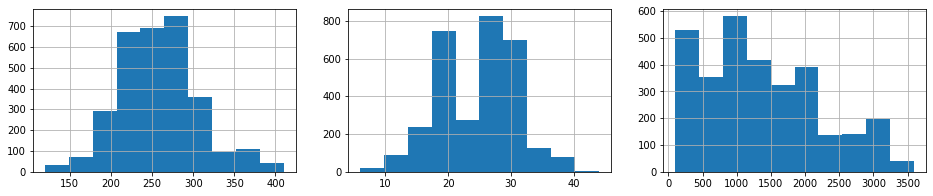

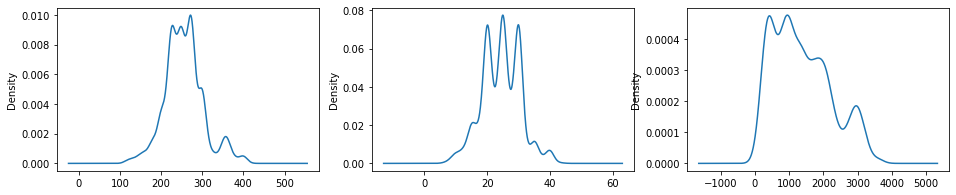

In [59]:
continuous = ['minutesPerWeekEnglish','studentsInEnglish','schoolSize']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(continuous, axes):
    df[xcol].hist(ax=ax)
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(continuous, axes):
    df[xcol].plot.kde(ax=ax)

In [60]:
non_normal = continuous
non_normal_no_zeros = []
for column in non_normal:
    if (df[column] == 0).sum() == 0 and (df[column] < 0).sum() == 0:
        non_normal_no_zeros.append(column)
non_normal_no_zeros   

['minutesPerWeekEnglish', 'studentsInEnglish', 'schoolSize']

In [61]:
for feat in non_normal_no_zeros:
    dropped_col.append(feat)
    col_name = "log_"+feat
    df[col_name] = df[feat].map(lambda x: np.log(x))

In [62]:
df.head()

,grade,male,preschool,expectBachelors,motherHS,motherWork,fatherHS,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White,log_minutesPerWeekEnglish,log_studentsInEnglish,log_schoolSize
0,9,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81,0,0,0,0,0,0,1,5.521461,3.332205,7.117206
1,10,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11,0,0,1,0,0,0,0,5.298317,3.135494,7.878534
2,10,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89,0,0,0,1,0,0,0,5.521461,3.555348,6.998510
3,10,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36,0,0,0,0,0,0,1,5.703782,3.401197,7.556428
4,9,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,378.0,20.0,0.0,1,1,502.0,428.96,0,0,0,0,0,0,1,5.934894,2.995732,6.218600


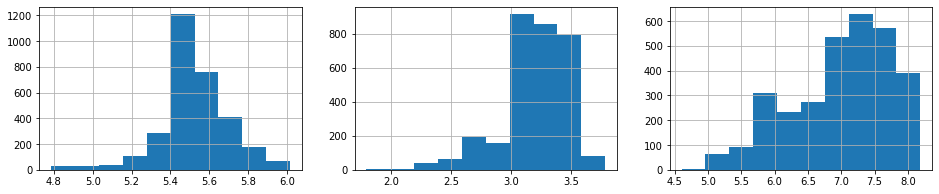

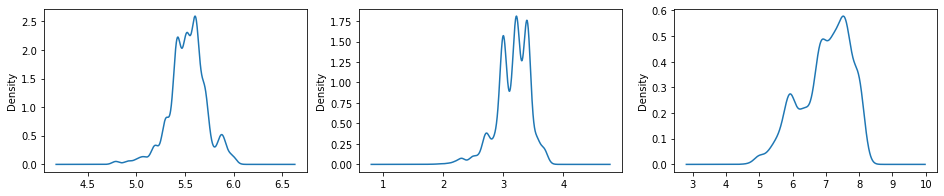

In [64]:
transformed = ['log_minutesPerWeekEnglish','log_studentsInEnglish','log_schoolSize']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(transformed, axes):
    df[xcol].hist(ax=ax)
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(transformed, axes):
    df[xcol].plot.kde(ax=ax)

In [28]:
# sns.heatmap(df.corr(),center= 0,cmap= 'coolwarm')

In [31]:
# f, ax = plt.subplots(figsize=(16, 12))
# matrix = np.triu(df.corr())
# sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)
